/home/ben/anaconda3/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/ben/anaconda3/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/ben/anaconda3/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

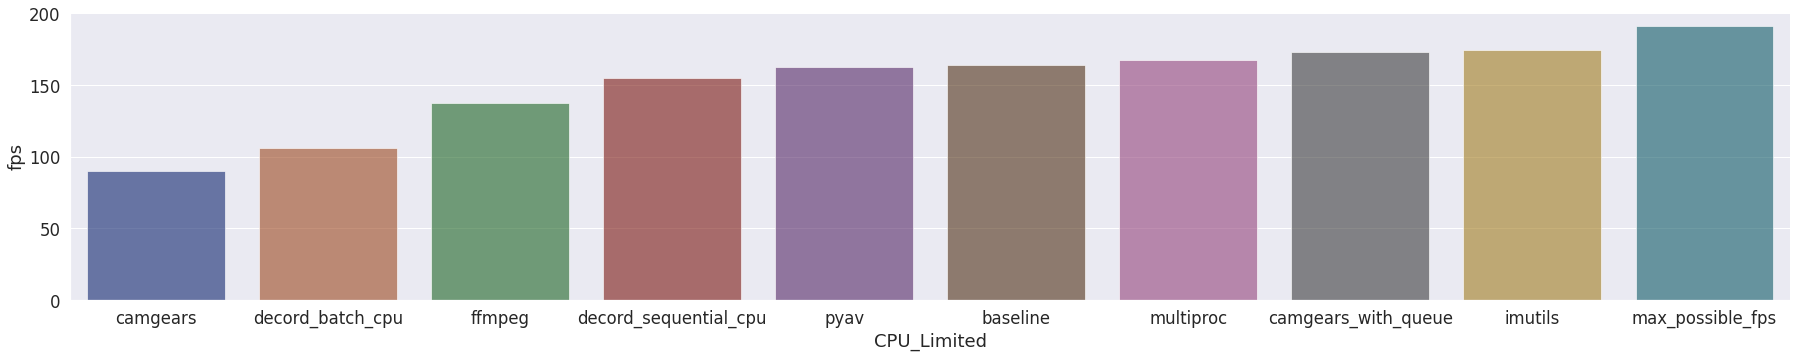

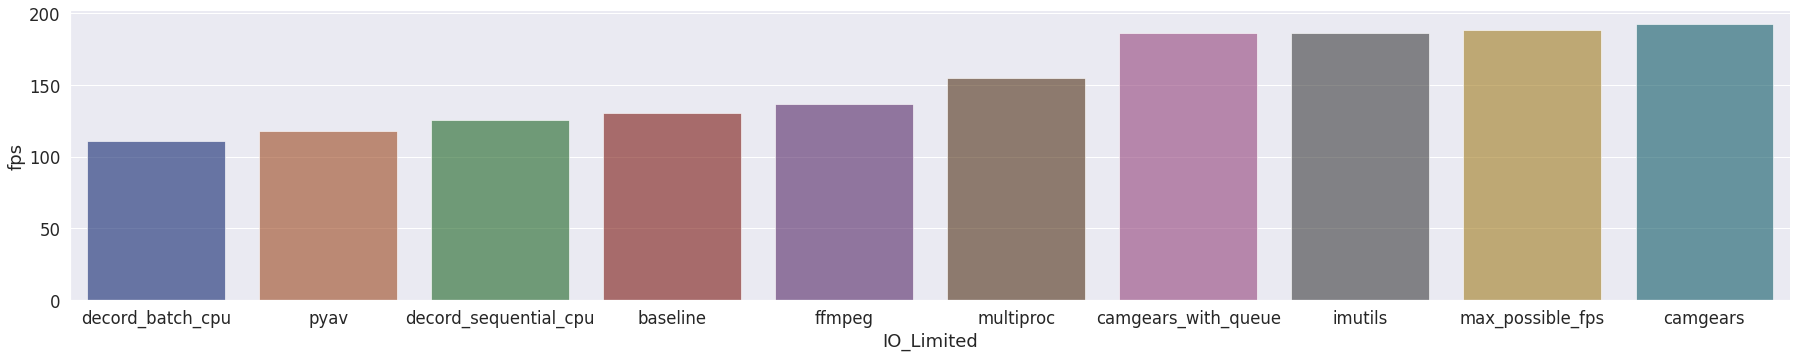

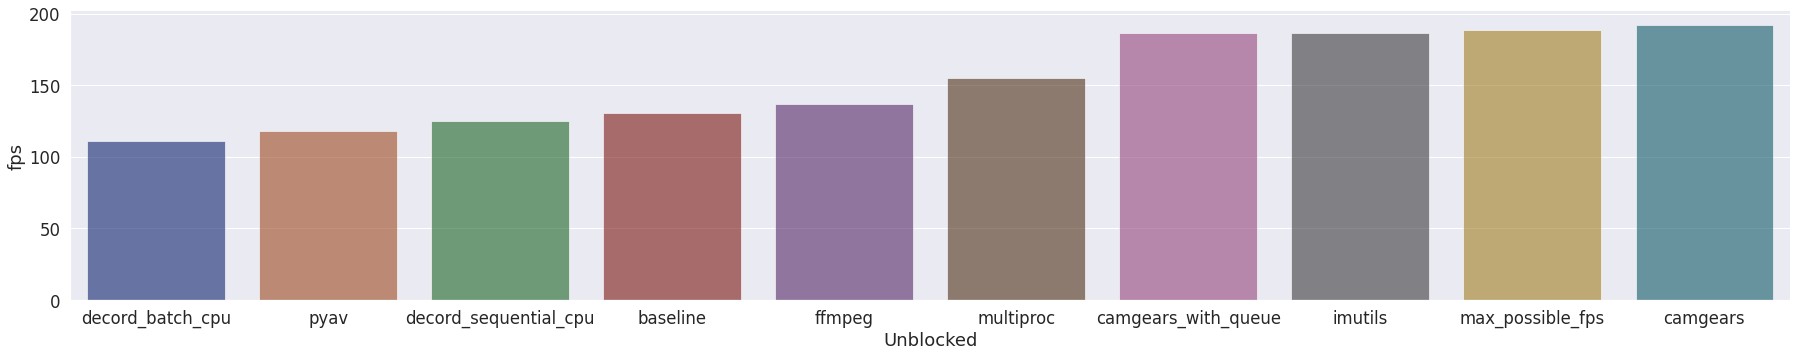

In [104]:
import seaborn as sns
import pandas as pd

cpu = pd.read_csv("benchmark_timings_cpulimited.csv")
io = pd.read_csv("benchmark_timings_iolimited.csv")
unblocked = pd.read_csv("benchmark_timings_iolimited.csv")
def plot(df, title):
    df = df[~df.groupname.str.contains("ffmpeg_unblocked_decoding_speed")]
    df["groupname"] = df.groupname.str.split("_benchmark", expand=True)[0]
    sns.set(font_scale=1.5)  
    g = sns.catplot( data=df, kind="bar",
        x="groupname", y="fps", palette="dark", alpha=.6, height=5, aspect=5, legend=True, legend_out=True)
    plt.xlabel(title)
    plt.savefig(title+".pdf")
plot(cpu, "CPU_Limited")
plot(io, "IO_Limited")
plot(unblocked, "Unblocked")

Text(0.5, 15.174374999999998, 'CPU Limited')

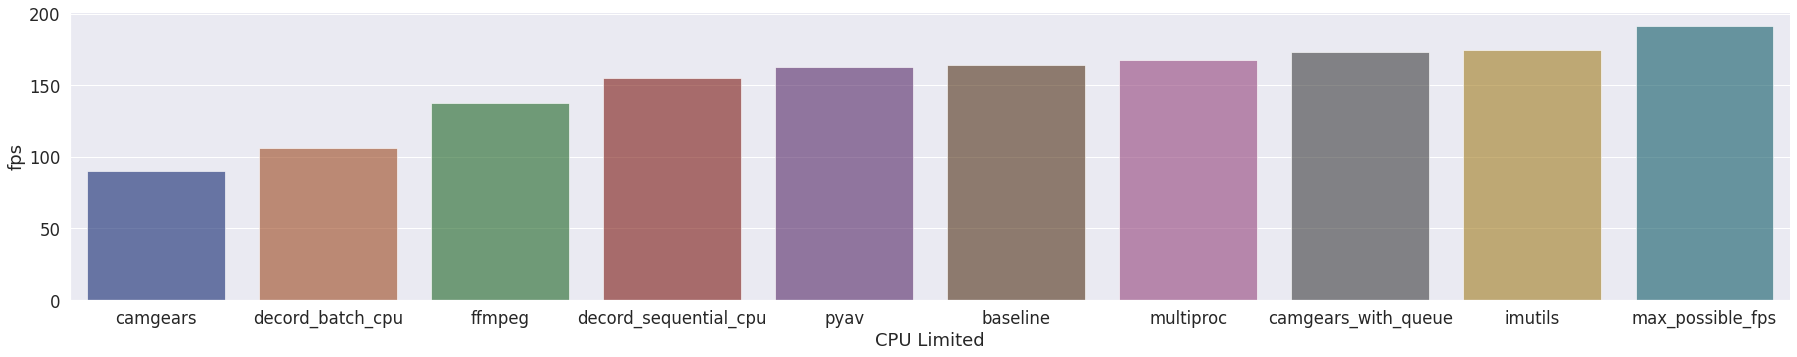

{'baseline': (0.86, 0.3712, 0.33999999999999997), 'camgears': (0.86, 0.6548363636363637, 0.33999999999999997), 'camgears_with_queue': (0.7815272727272726, 0.86, 0.33999999999999997), 'decord_batch_cpu': (0.4978909090909092, 0.86, 0.33999999999999997), 'decord_sequential_cpu': (0.33999999999999997, 0.86, 0.46574545454545463), 'ffmpeg': (0.33999999999999997, 0.86, 0.7493818181818184), 'ffmpeg_unblocked_decoding_speed': (0.33999999999999997, 0.6869818181818181, 0.86), 'imutils': (0.33999999999999997, 0.4033454545454544, 0.86), 'max_possible_fps': (0.560290909090909, 0.33999999999999997, 0.86), 'multiproc': (0.8439272727272731, 0.33999999999999997, 0.86), 'pyav': (0.86, 0.33999999999999997, 0.592436363636363)}
0 4.317715957333348
1 0.9025128944995232
2 0.38580852133418375
3 0.29751305516644305
4 0.23521854616592466
5 0.23327731716623626
6 0.15346209166697616
7 0.15277661666671824
8 0.14129032716603737
9 0.00032079066659207456
labels ['camgears', 'decord_batch_cpu', 'multiproc', 'ffmpeg', '

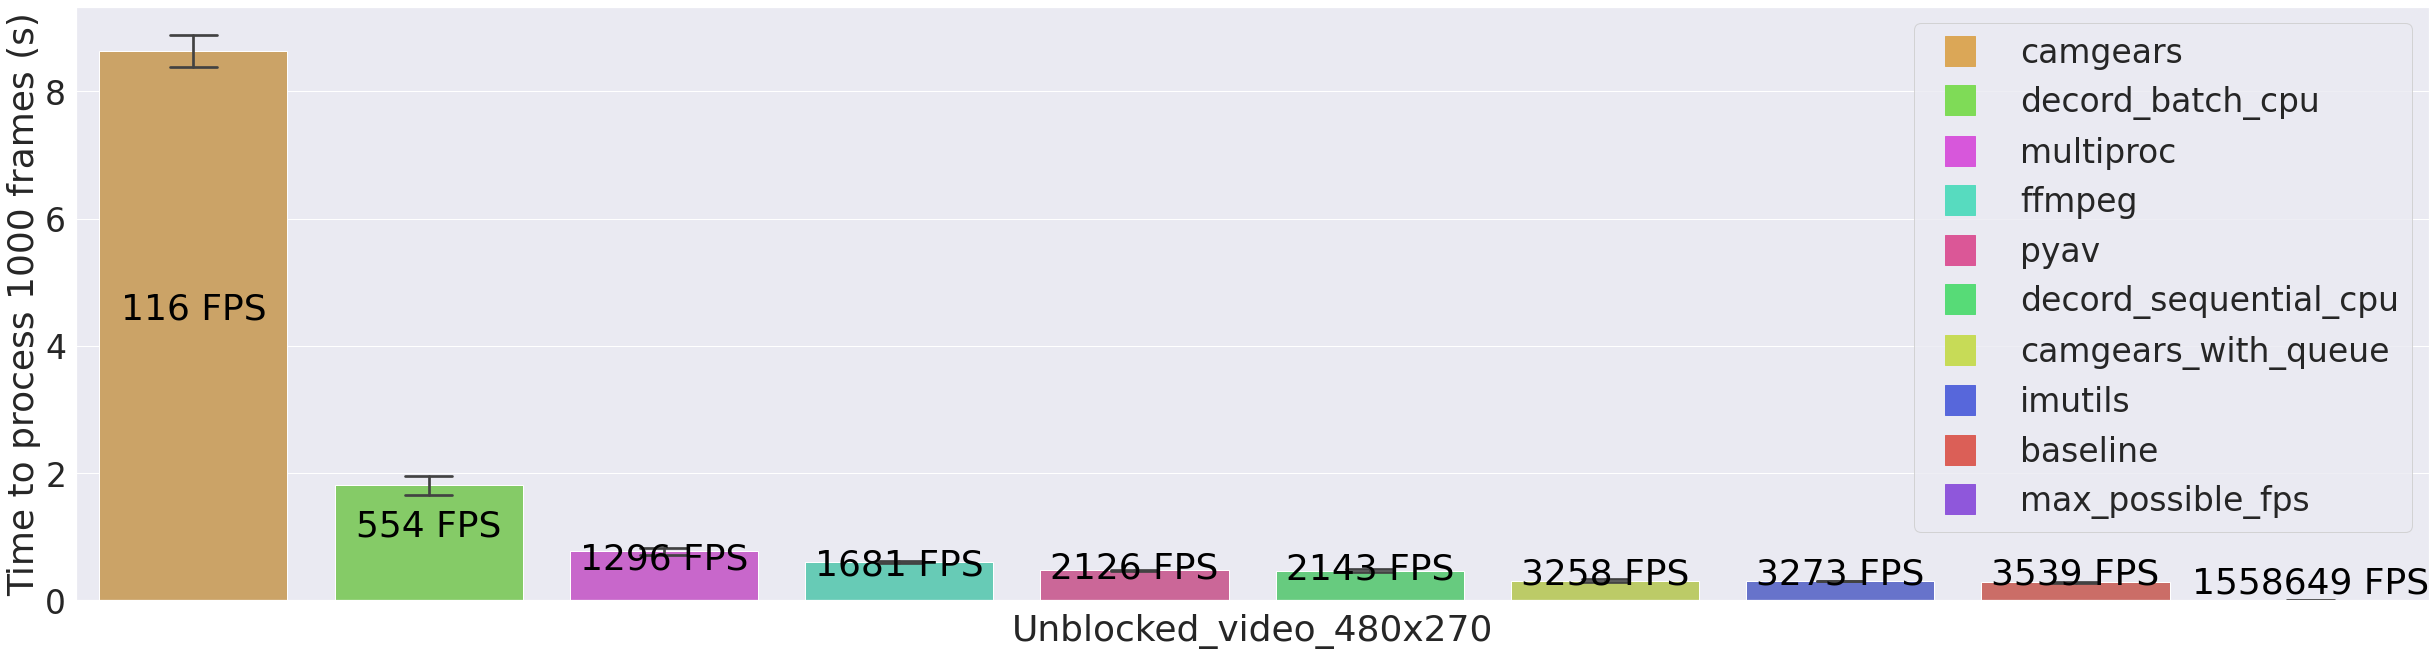

In [11]:
"""Plots graphs of timings"""
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D




def fps_plot(df, title):
    """plots graphs of timings"""
    df = df[~df.groupname.str.contains("ffmpeg_unblocked_decoding_speed")]
    df["groupname"] = df.groupname.str.split("_benchmark", expand=True)[0]
    sns.set(font_scale=1.8)
    g = sns.catplot(data=df, kind="bar",
                    x="groupname", y="fps", palette="dark", alpha=.6, height=5, aspect=5,
                    legend=True, legend_out=True)
    plt.xlabel(title)
    plt.savefig(title + ".png")


def combined_plot(df, title):
    """plots graphs of timings"""
    df["groupname"] = df.groupname.str.split("_benchmark", expand=True)[0]
    # This item is not needed given we have an unblocked graph
    df = df[~df.groupname.str.contains("ffmpeg_unblocked_decoding_speed")].reset_index()

    # Put the colors into a list, in order of increasing FPS (the values here are pre sorted)
    # by using a global color mapping we ensure consistent colors between graph
    palette = [GLOBAL_COLOR_MAPPINGS[group] for group in df.groupname.values]

    sns.set(font_scale=3)

    def barplot_err(x, y, xerr=None, yerr=None, data=None, **kwargs):
        """Plot a bar graph with hand defined symmetrical error bars"""

        _data = []
        for _i in data.index:

            _data_i = pd.concat([data.loc[_i:_i]] * 3, ignore_index=True, sort=False)
            _row = data.loc[_i]
            if xerr is not None:
                _data_i[x] = [_row[x] - _row[xerr], _row[x], _row[x] + _row[xerr]]
            if yerr is not None:
                _data_i[y] = [_row[y] - _row[yerr], _row[y], _row[y] + _row[yerr]]
            _data.append(_data_i)

        _data = pd.concat(_data, ignore_index=True, sort=False)

        _ax = sns.barplot(x=x, y=y, data=_data, ci="sd", **kwargs)

        return _ax

    _, ax = plt.subplots(figsize=(35, 10))
    _ax = barplot_err(x="groupname", y="time_for_all_frames", yerr="stddev_for_all_frames",
                      capsize=.2, data=df, ax=ax, palette=palette)
    
    _ax.set_xticklabels([]) # remove labels on each bar
    
    legend_markers = []
    legend_labels = []
    for _, row in df.iterrows():
        print(row.name, row.time_for_all_frames - row.time_for_all_frames * 0.5)
        _ax.text(row.name, row.time_for_all_frames - row.time_for_all_frames * 0.5,
                 f"{int(round(row.fps, 0))} FPS", color="black", ha="center", va="bottom")
        # plot legend
        rect = Line2D([], [], marker="s", markersize=30, linewidth=0, color=palette[_])
        legend_markers.append(rect)
        legend_labels.append(row.groupname)
    print("labels", legend_labels)
    _ax.legend(legend_markers, legend_labels)

    
    #plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
    plt.xlabel(title)
    plt.ylabel("Time to process 1000 frames (s)")
    plt.tight_layout()
    plt.savefig(title + ".png")
    return _ax

suffix = "_video_720x480.csv"

for suffix in ["_video_480x270"]:
    unblocked = pd.read_csv(f"benchmark_timings_unblocked{suffix}.csv")
    io = pd.read_csv(f"benchmark_timings_iolimited{suffix}.csv")
    cpu = pd.read_csv(f"benchmark_timings_cpulimited{suffix}.csv")
    #unblocked = unblocked[~unblocked.groupname.str.contains("max_possible_fps")].reset_index()

    tmp_palette = sns.color_palette("hls", len(unblocked.groupname))
    unblocked["groupname"] = unblocked.groupname.str.split("_benchmark", expand=True)[0]
    GLOBAL_COLOR_MAPPINGS = {group: color for group, color in zip(sorted(unblocked.groupname.values),
                                                                  tmp_palette)}
    print(GLOBAL_COLOR_MAPPINGS)
    ax = combined_plot(unblocked, f"Unblocked{suffix}")


In [3]:
ax.legend()

No handles with labels found to put in legend.
